In [2]:
import twitter

In [3]:
CONSUMER_KEY = 'AX2jv94ZUykw0yyJ4hWR8Q1sB'
CONSUMER_SECRET ='YXqYJf8bHL9AoKUZsutGlBkLxac46EupVipm8Wqwy5QEGLahO3'
OAUTH_TOKEN = '66285271-8cxEAyLEw7B4AeLNce2jpTfiK4CN63ITo9HQ4aBfJ'
OAUTH_TOKEN_SECRET = 'XpFPJRSBverYCIrOg4OZZwvsgQN5eK4qBtRmuzACvLSIr'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print twitter_api

In [4]:
WORLD_WOE_ID = 1
US_WOE_ID = 23424977

In [5]:
IND_WOE_ID = 23424848

In [6]:
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)
india_trends = twitter_api.trends.place(_id=IND_WOE_ID)

In [7]:
import json

print json.dumps(india_trends, indent=1)

[
 {
  "created_at": "2017-05-09T07:46:11Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23MaharanaPratap", 
    "query": "%23MaharanaPratap", 
    "tweet_volume": null, 
    "name": "#MaharanaPratap", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23TuesdayThoughts", 
    "query": "%23TuesdayThoughts", 
    "tweet_volume": null, 
    "name": "#TuesdayThoughts", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23Fidaa", 
    "query": "%23Fidaa", 
    "tweet_volume": null, 
    "name": "#Fidaa", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23VijayMallya", 
    "query": "%23VijayMallya", 
    "tweet_volume": null, 
    "name": "#VijayMallya", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23JusticeKarnan", 
    "query": "%23JusticeKarnan", 
    "tweet_volume": null, 
    "name": "#JusticeKarnan", 
    "promoted_content": null
   

In [8]:
from prettytable import PrettyTable

world_trends = [trend['name'] for trend in world_trends[0]['trends']]
us_trends = [trend['name'] for trend in us_trends[0]['trends']]
india_trends = [trend['name'] for trend in india_trends[0]['trends']]

pt = PrettyTable(field_names=['World Trends', 'US Trends', 'India Trends'])

for world_trend, us_trend, india_trend in zip(world_trends, us_trends, india_trends):
    pt.add_row([world_trend, us_trend, india_trend])

print pt

+---------------------------------+-----------------------+-----------------------------+
|           World Trends          |       US Trends       |         India Trends        |
+---------------------------------+-----------------------+-----------------------------+
|     #هل_تتزوج_بنت_تاكل_كبده     | #GameOfThronesTVShows |       #MaharanaPratap       |
|               Ahok              |    #BetterCallSaul    |       #TuesdayThoughts      |
|           #FelizMartes          |       Ray Allen       |            #Fidaa           |
|            #투표인증            |      #DearMamaVH1     |         #VijayMallya        |
|         #ححياتك_في_كلمه         |   #StateYourPhobias   |        #JusticeKarnan       |
|              #Valls             | #IJustLoveThatCartoon |    Juhi Preity Live On UC   |
|              투표율             |        Hellboy        |     Intex Aqua Lions 4G     |
|           こずえちゃん          |       Jed Lowrie      |        Delhi Assembly       |
|            V系クイズ     

In [9]:
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)
india_trends = twitter_api.trends.place(_id=IND_WOE_ID)

world_trends_set = set([trend['name'] for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print common_trends

set([u'#BetterCallSaul', u'#GameOfThronesTVShows', u'#Situaci\xf3nAmorosa', u'#Puputov', u'Ahok'])


In [12]:
from urllib import unquote


In [10]:
q = '#Baahubali2'
count = 100

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


In [13]:
for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print json.dumps(statuses[19], indent=1)

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "contributors": null, 
 "truncated": false, 
 "text": "RT @rameshlaus: #Baahubali2 11 Days WW Box office:\n\nIndia:\n\nNett : \u20b9 710 cr\n\nGross : \u20b9 910 Cr\n\nOverseas:\n\nGross: \u20b9 210 cr\n\nTotal: \u20b9 1,120 c\u2026", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 861850897944543232, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 102268884, 
    "indices": [
     3, 
     14
    ], 
    "id_str": "102268884", 
    "screen_name": "rameshlaus", 
    "name": "Ramesh Bala"
   }
  ], 
  "hashtags": [
   {
    "indices": [
     16, 
     27
    ], 
    "text": "Baahubali2"
   }
  ], 
  "urls": []
 }, 
 "retweeted": false, 
 "coordinates": null, 
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>", 
 "in_reply_to_screen_name": null, 
 "in_reply

In [14]:
print type(statuses)

<type 'list'>


In [15]:
print json.dumps(statuses[9], indent=1)

{
 "contributors": null, 
 "truncated": false, 
 "text": "RT @BcinemaFrance: #Baahubali2 on BBC News BEST INDIAN CINEMA // @BaahubaliMovie  @ssrajamouli @BBCWorld @Baahubali2017 https://t.co/FD2050\u2026", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 861851039112208384, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 2174529290, 
    "indices": [
     3, 
     17
    ], 
    "id_str": "2174529290", 
    "screen_name": "BcinemaFrance", 
    "name": "BCINEMA \u00a9"
   }, 
   {
    "id": 1094462006, 
    "indices": [
     65, 
     80
    ], 
    "id_str": "1094462006", 
    "screen_name": "BaahubaliMovie", 
    "name": "Baahubali"
   }, 
   {
    "id": 136479128, 
    "indices": [
     82, 
     94
    ], 
    "id_str": "136479128", 
    "screen_name": "ssrajamouli", 
    "name": "rajamouli ss"
   }, 
   {
    "id": 742143, 
    "indices": [
     95, 
     104
    ], 
    "id_str": "742143", 
    "screen_name": "BBCWor

In [16]:
t = [ status 
      for status in statuses
          if status['id'] == 861850897944543232 ][0]


In [18]:
print t['retweet_count']
print t['retweeted_status']

35
{u'contributors': None, u'truncated': True, u'text': u'#Baahubali2 11 Days WW Box office:\n\nIndia:\n\nNett : \u20b9 710 cr\n\nGross : \u20b9 910 Cr\n\nOverseas:\n\nGross: \u20b9 210 cr\n\nTotal: \u20b9\u2026 https://t.co/vfVSO6fxDT', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 861848484575444992L, u'favorite_count': 88, u'entities': {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [0, 11], u'text': u'Baahubali2'}], u'urls': [{u'url': u'https://t.co/vfVSO6fxDT', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/861848484575444992', u'display_url': u'twitter.com/i/web/status/8\u2026'}]}, u'retweeted': False, u'coordinates': None, u'source': u'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', u'in_reply_to_screen_name': None, u'in_reply_to_user_id': None, u'retweet_count': 35, u'id_str': u'861848484575444992', u'favorited': False, u'user': {u'follow_request_sent': False, u'has_extended_profile': False,

In [23]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print json.dumps(status_texts[0:5], indent=2)
print json.dumps(screen_names[0:5], indent=2) 
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

print len(status_texts)

[
  "RT @taran_adarsh: #Baahubali2 is now set to cross \u20b9 350 cr, the FASTEST to achieve it. Seriously, is there any record left? This film is tr\u2026", 
  "#Baahubali2 11 Days Worldwide Box office Collection.. 1st ever 1,100Cr+ for an Indian Movie..\n\nIndia: 910Cr\n\nOverse\u2026 https://t.co/apVbKUE6Dl", 
  "RT @rameshlaus: #Baahubali2 in Hindi beats #PK to become All-Time No.2 Hindi \n\n#Baahubali2 in 11 days: \u20b9 344.25 cr Nett.\n\n#PK (Lifetime) -\u2026", 
  "RT @KollywudCinema: Huge 2nd Monday for #Baahubali2. \n\n#1100CrBaahubali2 seems unstoppable even after crossing almost all the prestigious l\u2026", 
  "RT @taran_adarsh: #Baahubali2 - ALL LANGUAGES - Week 1 NETT: \u20b9 534 cr. India biz... Undoubtedly, the BIGGEST BLOCKBUSTER ever."
]
[
  "taran_adarsh", 
  "rameshlaus", 
  "KollywudCinema", 
  "taran_adarsh", 
  "taran_adarsh"
]
[
 "Baahubali2", 
 "Baahubali2", 
 "Baahubali2", 
 "PK", 
 "Baahubali2"
]
[
 "RT", 
 "@taran_adarsh:", 
 "#Baahubali2", 
 "is", 
 "now"


In [24]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top 10
    printb

[(u'\u20b9', 674), (u'#Baahubali2', 549), (u'RT', 500), (u'Fastest', 388), (u'cr...', 371), (u'is', 348), (u'to', 283), (u'@taran_adarsh:', 185), (u'the', 184), (u'in', 167)]

[(u'taran_adarsh', 189), (u'rameshlaus', 63), (u'BaahubaliMovie', 31), (u'ssrajamouli', 27), (u'mithunraman', 15), (u'TrollywoodOffl', 15), (u'Forumkeralam1', 13), (u'BcinemaFrance', 11), (u'LMKMovieManiac', 9), (u'WSJ', 9)]

[(u'Baahubali2', 596), (u'PK', 61), (u'baahubali2', 26), (u'Prabhas', 19), (u'1000croreBaahubali', 16), (u'Kerala', 14), (u'SSRajamouli', 12), (u'Vivegam', 9), (u'Baahubali', 8), (u'Enthiran2', 8)]



In [26]:

from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print pt

+----------------+-------+
| Word           | Count |
+----------------+-------+
| ₹              |   674 |
| #Baahubali2    |   549 |
| RT             |   500 |
| Fastest        |   388 |
| cr...          |   371 |
| is             |   348 |
| to             |   283 |
| @taran_adarsh: |   185 |
| the            |   184 |
| in             |   167 |
+----------------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| taran_adarsh   |   189 |
| rameshlaus     |    63 |
| BaahubaliMovie |    31 |
| ssrajamouli    |    27 |
| mithunraman    |    15 |
| TrollywoodOffl |    15 |
| Forumkeralam1  |    13 |
| BcinemaFrance  |    11 |
| LMKMovieManiac |     9 |
| WSJ            |     9 |
+----------------+-------+
+--------------------+-------+
| Hashtag            | Count |
+--------------------+-------+
| Baahubali2         |   596 |
| PK                 |    61 |
| baahubali2         |    26 |
| Prabhas            |    19 |
| 1000croreBaahubali |    1

In [49]:
# lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)


0.156025473547
0.20524691358
0.131131131131
20.4133333333


In [27]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print pt

+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 4303  | urstrulyMahesh | RT @urstrulyMahesh: The master storyteller is      |
|       |                | back! #Baahubali2 is an event film which exceeds   |
|       |                | expectations!                                      |
| 4303  | urstrulyMahesh | RT @urstrulyMahesh: The master storyteller is      |
|       |                | back! #Baahubali2 is an event film which exceeds   |
|       |                | expectations!                                      |
| 4155  | BaahubaliMovie | RT @BaahubaliMovie: Thank you @BBCNews             |
|       |                | 🙏🏻🙏🏻🙏🏻. We are very happy :) #Baahubali2     |
|       |                | https://t.co/GUFRjFEgp0                            |
| 4155  | BaahubaliMovie | RT @BaahubaliMovie:

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


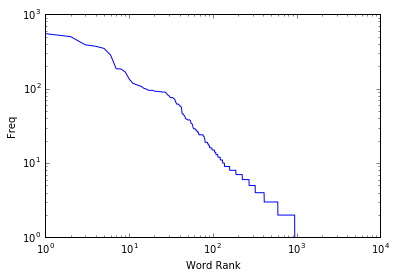

In [34]:
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

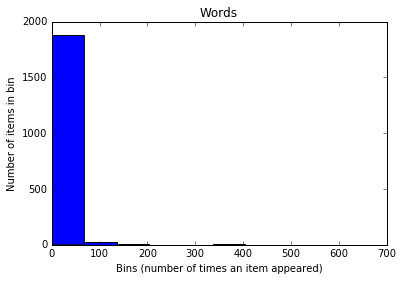

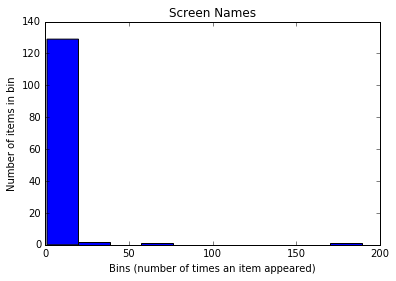

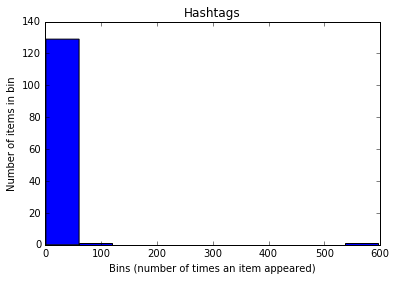

In [35]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

Code to 

In [48]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False


def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

#Reading Tweets
print 'Reading Tweets\n'
tweets_data_path = 'output.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue


#Structuring Tweets
print 'Structuring Tweets\n'
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)


Reading Tweets

Structuring Tweets



Analyzing tweets by language



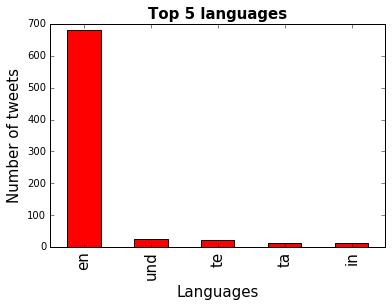

In [38]:
#Analyzing Tweets by Language
print 'Analyzing tweets by language\n'
tweets_by_lang = tweets['lang'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
plt.savefig('tweet_by_lang', format='png')

In [39]:
tweets.head()

,text,lang,country
0,RT @rameshlaus: #Baahubali2 10 Days WW Box off...,en,None
1,RT @Fukkard: మన నెత్తురే ఓ మహాసేనా ... \n\nhtt...,te,None
2,RT @BaahubaliMovie: This day will be remembere...,en,None
3,RT @annayyaabhimani: Tarak and mahesh only SSR...,in,None
4,ఊహించని విజయం... జక్కన్నా ధన్యవాదాలు... \n#Baa...,te,None


Analyzing tweets by country



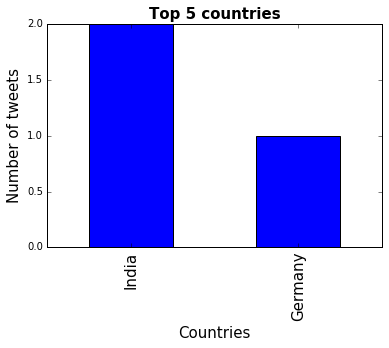

In [40]:
#Analyzing Tweets by Country
print 'Analyzing tweets by country\n'
tweets_by_country = tweets['country'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
plt.savefig('tweet_by_country', format='png')

In [41]:
#Filter out tweets that contain language other than English

tweets_en = tweets[tweets['lang'] == 'en']

In [42]:
tweets_en.head()

,text,lang,country
0,RT @rameshlaus: #Baahubali2 10 Days WW Box off...,en,None
2,RT @BaahubaliMovie: This day will be remembere...,en,None
6,RT @ActorPrabha: #Baahubali2 - #PRABHAS's an a...,en,None
7,RT @Bahubali2News: #Baahubali2 Baahubali 2 Box...,en,None
8,RT @sweetyanushkafc: #Baahubali2 new teaser is...,en,None


In [43]:
for tw in tweets_en.text:
    print tw

RT @rameshlaus: #Baahubali2 10 Days WW Box office:

India:

Nett : ₹ 675 cr

Gross : ₹ 860 Cr

Overseas:

Gross: ₹ 200 cr

Total: ₹ 1,060 cr
RT @BaahubaliMovie: This day will be remembered in the India Cinema History. Thank you all for your great support..🙏🙏🙏… 
RT @ActorPrabha: #Baahubali2 - #PRABHAS's an awesome  painting art 🎨 by #DHAVAL.K 👏 
*Hats Off Bro... 👌 😍 
#1000croreBaahubali2 🙏
Ja… 
RT @Bahubali2News: #Baahubali2 Baahubali 2 Box Office Collection Day 10: Hindi Version Inches Towards R 400 Crore - NDTV… 
RT @sweetyanushkafc: #Baahubali2 new teaser is lit!🔥
#AnushkaShetty #Devasena 😍😍♥

https://t.co/xJVMytfX81 https://t.co/oR1PTIOqIG
RT @baraju_SuperHit: Latest trailer of #Baahubali2 The No 1 Blockbuster Of Indian Cinema
https://t.co/sExS3pEpDQ
Delhi ACB Golden Temple #Duplicate #BankChor #आप_का_सच #MaanaKeHumYaarNahin #DelhiMetro #1000croreBaahubali
https://t.co/E7sZGvwPNf
RT @im_vegee: #RanaDaggubati Hunk \,,/ 
#Baahubali2 Post Release Teaser 👊 https://t.co/FUrigRw1HZ
RT @Ka

In [44]:
from textblob import TextBlob

In [45]:
for text in tweets_en.text:
    analysis = TextBlob(text)
    print(text, " ", analysis.sentiment)
    print("")

(u'RT @rameshlaus: #Baahubali2 10 Days WW Box office:\n\nIndia:\n\nNett : \u20b9 675 cr\n\nGross : \u20b9 860 Cr\n\nOverseas:\n\nGross: \u20b9 200 cr\n\nTotal: \u20b9 1,060 cr', ' ', Sentiment(polarity=0.0, subjectivity=0.25))

(u'RT @BaahubaliMovie: This day will be remembered in the India Cinema History. Thank you all for your great support..\U0001f64f\U0001f64f\U0001f64f\u2026 ', ' ', Sentiment(polarity=0.8, subjectivity=0.75))

(u"RT @ActorPrabha: #Baahubali2 - #PRABHAS's an awesome  painting art \U0001f3a8 by #DHAVAL.K \U0001f44f \n*Hats Off Bro... \U0001f44c \U0001f60d \n#1000croreBaahubali2 \U0001f64f\nJa\u2026 ", ' ', Sentiment(polarity=1.0, subjectivity=1.0))

(u'RT @Bahubali2News: #Baahubali2 Baahubali 2 Box Office Collection Day 10: Hindi Version Inches Towards R 400 Crore - NDTV\u2026 ', ' ', Sentiment(polarity=0.0, subjectivity=0.0))

(u'RT @sweetyanushkafc: #Baahubali2 new teaser is lit!\U0001f525\n#AnushkaShetty #Devasena \U0001f60d\U0001f60d\u2665\n\nhttps://t.co/xJVMyt

,text,lang,country
0,RT @rameshlaus: #Baahubali2 10 Days WW Box off...,en,None
2,RT @BaahubaliMovie: This day will be remembere...,en,None
6,RT @ActorPrabha: #Baahubali2 - #PRABHAS's an a...,en,None
7,RT @Bahubali2News: #Baahubali2 Baahubali 2 Box...,en,None
8,RT @sweetyanushkafc: #Baahubali2 new teaser is...,en,None
